In [43]:
import os


files = os.listdir('../videos')
files = [f for f in files if f.endswith('.csv')]

In [44]:
# Combine all the csv files into one
import pandas as pd
HISTORY = True
if HISTORY:
    df = pd.concat([pd.read_csv('../videos/' + f) for f in files])
    files_history = [f for f in os.listdir('../videos/history') if f.endswith('.csv')]
    df_history = pd.concat([pd.read_csv('../videos/history/' + f) for f in files_history])
    df = pd.concat([df, df_history])
    files_history = [f for f in os.listdir('../videos/history2') if f.endswith('.csv')]
    df_history = pd.concat([pd.read_csv('../videos/history2/' + f) for f in files_history])
    df = pd.concat([df, df_history])
    df = df.drop_duplicates()
else:
    df = pd.concat([pd.read_csv('../videos/' + f) for f in files])
    df = df.drop_duplicates()
df.to_csv('../videos/all_videos.csv', index=False)

In [45]:
# Load the combined csv file
df = pd.read_csv('../videos/all_videos.csv')

In [46]:
import plotly.express as px
import pandas as pd

# Assuming df is a pandas DataFrame with relevant data
# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['published_at']).dt.date
df['view_count'] = df['view_count'].fillna(0).astype(int)
df['like_count'] = df['like_count'].fillna(0).astype(int)
df['comment_count'] = df['comment_count'].fillna(0).astype(int)

# Group data by Date and channel_name
grouped_df = df.groupby(['Date', 'channel_name']).sum().reset_index()

# Plot View Count by Channel
fig_view = px.line(grouped_df, x='Date', y='view_count', color='channel_name', title='View Count by Channel')
fig_view.update_layout(xaxis_title='Date', yaxis_title='View Count', xaxis=dict(tickangle=-45))
fig_view.show()

# Plot Like Count by Channel
fig_like = px.line(grouped_df, x='Date', y='like_count', color='channel_name', title='Like Count by Channel')
fig_like.update_layout(xaxis_title='Date', yaxis_title='Like Count', xaxis=dict(tickangle=-45))
fig_like.show()

# Plot Comment Count by Channel
fig_comment = px.line(grouped_df, x='Date', y='comment_count', color='channel_name', title='Comment Count by Channel')
fig_comment.update_layout(xaxis_title='Date', yaxis_title='Comment Count', xaxis=dict(tickangle=-45))
fig_comment.show()


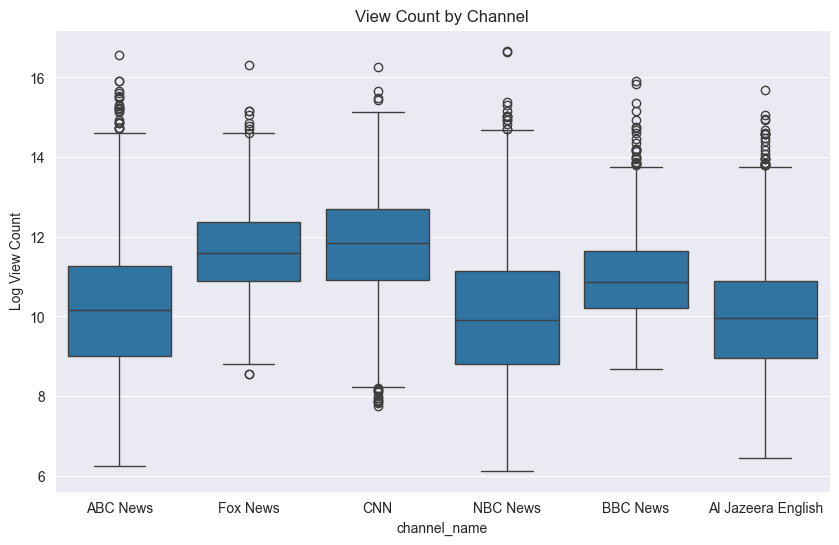

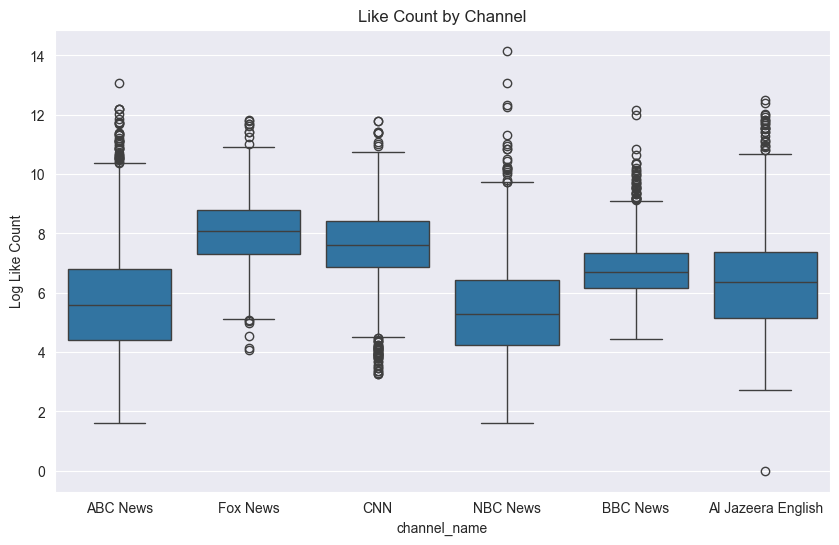

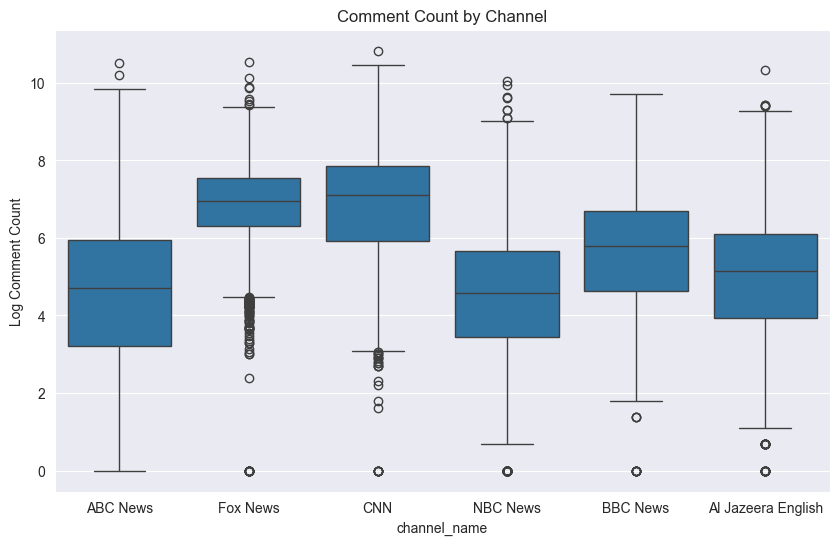

In [47]:
# box plot for view count, like count, and comment count
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# use log scale for better visualization
df['view_count_log'] = df['view_count'].apply(lambda x: 0 if x == 0 else np.log(x))
df['like_count_log'] = df['like_count'].apply(lambda x: 0 if x == 0 else np.log(x))
df['comment_count_log'] = df['comment_count'].apply(lambda x: 0 if x == 0 else np.log(x))

plt.figure(figsize=(10, 6))
sns.boxplot(x='channel_name', y='view_count_log', data=df)
plt.title('View Count by Channel')
plt.ylabel('Log View Count')    
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='channel_name', y='like_count_log', data=df)
plt.title('Like Count by Channel')
plt.ylabel('Log Like Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='channel_name', y='comment_count_log', data=df)
plt.title('Comment Count by Channel')
plt.ylabel('Log Comment Count')
plt.show()

In [48]:
political_words = ['trump', 'biden', 'democrat', 'republican']
political_df = df[df['video_title'].str.contains('|'.join(political_words), case=False)]

In [49]:
import plotly.express as px
import pandas as pd

# Assuming df and political_df are pandas DataFrames with relevant data
# Ensure the 'Date' column is in datetime format and make a copy to avoid SettingWithCopyWarning
political_df = political_df.copy()
political_df['Date'] = pd.to_datetime(political_df['published_at']).dt.date

df = df.copy()
df['Date'] = pd.to_datetime(df['published_at']).dt.date

# Plot Video Count by Channel for Political Videos
fig_video_count = px.line(political_df.groupby(['Date', 'channel_name'])['video_id'].count().reset_index(), 
                          x='Date', y='video_id', color='channel_name',
                          title='Video Count by Channel for Political Videos')
fig_video_count.update_layout(xaxis_title='Date', yaxis_title='Video Count', xaxis=dict(tickangle=-45))
fig_video_count.show()

# Plot Percentage of Political Videos by Channel
total_videos = df.groupby(['Date', 'channel_name'])['video_id'].count().reset_index()
political_videos = political_df.groupby(['Date', 'channel_name'])['video_id'].count().reset_index()
percentage_videos = political_videos.merge(total_videos, on=['Date', 'channel_name'], suffixes=('_political', '_total'))
percentage_videos['percentage'] = percentage_videos['video_id_political'] / percentage_videos['video_id_total']

fig_percentage_videos = px.line(percentage_videos, x='Date', y='percentage', color='channel_name',
                                title='Percentage of Political Videos by Channel')
fig_percentage_videos.update_layout(xaxis_title='Date', yaxis_title='Percentage', xaxis=dict(tickangle=-45))
fig_percentage_videos.show()

# Plot View Count by Channel for Political Videos
fig_view_count = px.line(political_df.groupby(['Date', 'channel_name'])['view_count'].sum().reset_index(), 
                         x='Date', y='view_count', color='channel_name',
                         title='View Count by Channel for Political Videos')
fig_view_count.update_layout(xaxis_title='Date', yaxis_title='View Count', xaxis=dict(tickangle=-45))
fig_view_count.show()

# Plot Like Count by Channel for Political Videos
fig_like_count = px.line(political_df.groupby(['Date', 'channel_name'])['like_count'].sum().reset_index(), 
                         x='Date', y='like_count', color='channel_name',
                         title='Like Count by Channel for Political Videos')
fig_like_count.update_layout(xaxis_title='Date', yaxis_title='Like Count', xaxis=dict(tickangle=-45))
fig_like_count.show()

# Plot Comment Count by Channel for Political Videos
fig_comment_count = px.line(political_df.groupby(['Date', 'channel_name'])['comment_count'].sum().reset_index(), 
                            x='Date', y='comment_count', color='channel_name',
                            title='Comment Count by Channel for Political Videos')
fig_comment_count.update_layout(xaxis_title='Date', yaxis_title='Comment Count', xaxis=dict(tickangle=-45))
fig_comment_count.show()


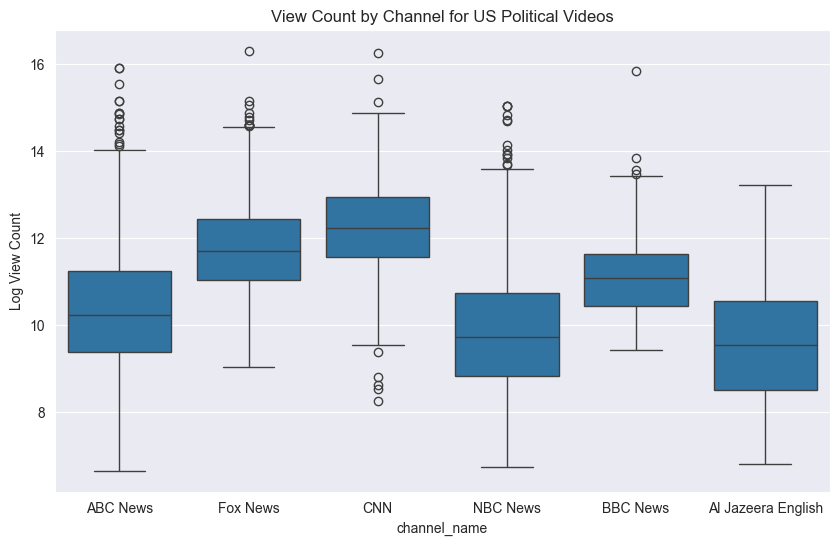

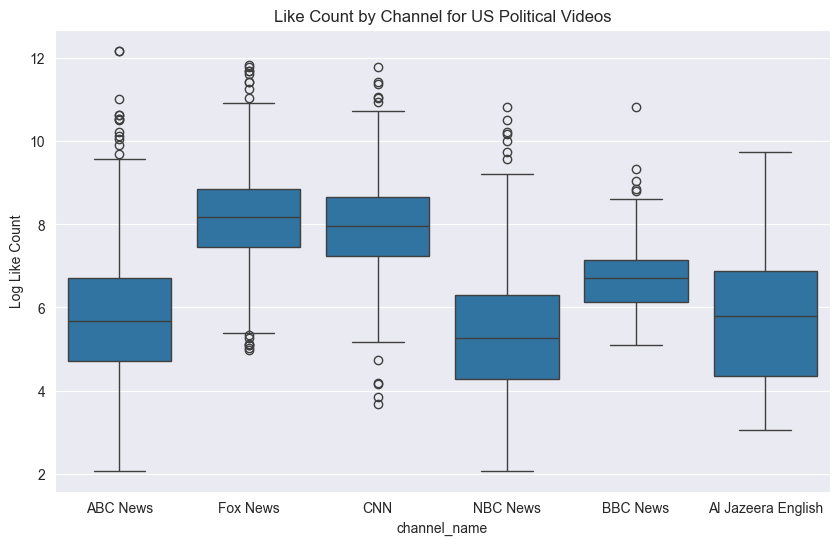

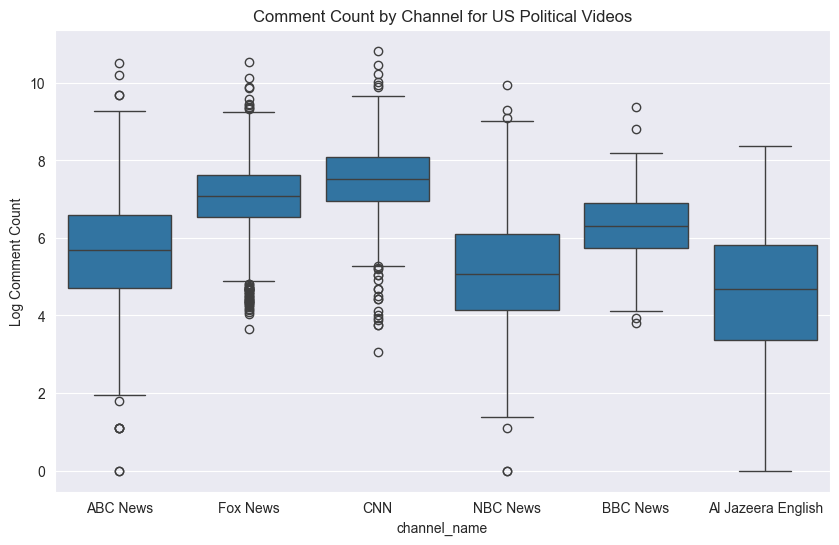

In [50]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure to create a copy of the DataFrame to avoid the SettingWithCopyWarning
political_df = political_df.copy()

# use log scale for better visualization
political_df['view_count_log'] = np.log(political_df['view_count'].replace(0, np.nan))
political_df['like_count_log'] = np.log(political_df['like_count'].replace(0, np.nan))
political_df['comment_count_log'] = np.log(political_df['comment_count'].replace(0, np.nan))

# Replace -inf values with 0 after applying log
political_df['view_count_log'] = political_df['view_count_log'].replace(-np.inf, 0)
political_df['like_count_log'] = political_df['like_count_log'].replace(-np.inf, 0)
political_df['comment_count_log'] = political_df['comment_count_log'].replace(-np.inf, 0)

plt.figure(figsize=(10, 6))
sns.boxplot(x='channel_name', y='view_count_log', data=political_df)
plt.title('View Count by Channel for US Political Videos')
plt.ylabel('Log View Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='channel_name', y='like_count_log', data=political_df)
plt.title('Like Count by Channel for US Political Videos')
plt.ylabel('Log Like Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='channel_name', y='comment_count_log', data=political_df)
plt.title('Comment Count by Channel for US Political Videos')
plt.ylabel('Log Comment Count')
plt.show()


In [51]:
# CNN and Fox News
cnn_fox = df[df['channel_name'].isin(['CNN', 'Fox News'])]
cnn_fox

,channel_name,video_title,published_at,video_id,view_count,like_count,comment_count,Date,view_count_log,like_count_log,comment_count_log
25,Fox News,‘The Five’: Kamala receives ‘brutal’ feedback ...,2024-04-23T23:30:09Z,ftU67hCYlvc,601874,10857,2533,2024-04-23,13.307803,9.292565,7.837160
26,Fox News,Tyrus: We have a terrorist group marching in N...,2024-04-23T22:45:00Z,KisbbLuB-WQ,409073,18953,5424,2024-04-23,12.921649,9.849718,8.598589
27,Fox News,‘The Five’: Trump clashes with prosecutors ove...,2024-04-23T22:00:14Z,QHh9B2VXO60,232233,6089,2479,2024-04-23,12.355496,8.714239,7.815611
28,Fox News,Biden ripped over cannibal claim: &#39;A plagi...,2024-04-23T21:15:00Z,a82pVg2ndP4,81678,2633,1259,2024-04-23,11.310540,7.875879,7.138073
29,Fox News,Trump: The gag order is &#39;totally unconstit...,2024-04-23T20:26:41Z,Rl14by2FRGw,57359,1395,1878,2024-04-23,10.957085,7.240650,7.537963
...,...,...,...,...,...,...,...,...,...,...,...
19438,CNN,Trump ally speaks at RNC right after leaving p...,2024-07-18T01:10:38Z,ztB4AHxYZj0,28562,540,137,2024-07-18,10.259832,6.291569,4.919981
19439,CNN,Biden &#39;receptive&#39; in discussions about...,2024-07-18T01:00:09Z,DLLsUcMJCmE,161831,1571,1336,2024-07-18,11.994308,7.359468,7.197435
19440,CNN,Trump tariffs take over Republican establishment,2024-07-18T00:49:02Z,4sXVOpVxFNI,24765,510,156,2024-07-18,10.117187,6.234411,5.049856
19441,CNN,Peter Navarro speaks at RNC hours after prison...,2024-07-18T00:30:02Z,41J3pIv2DKQ,30534,515,527,2024-07-18,10.326596,6.244167,6.267201


In [52]:
import numpy as np
import plotly.graph_objs as go

# Assuming cnn_fox and df are already defined as pandas DataFrame objects

# Group data and calculate view counts per channel per date
data = cnn_fox.groupby(['Date', 'channel_name'])['view_count'].sum().unstack().fillna(0)

# Calculate the 98th percentile for the view counts across all data
quantile = data.values.flatten()
quantile = quantile[quantile > 0]  # Remove zeros if necessary
percentile = np.percentile(quantile, 98)

# Create an interactive plot for view counts
fig = go.Figure()

for channel in data.columns:
    fig.add_trace(go.Scatter(x=data.index, y=data[channel], mode='lines', name=channel))

fig.add_hline(y=percentile, line=dict(color='red', dash='dash'), annotation_text=f'98th Percentile ({percentile:.2f})', annotation_position='top left')
fig.update_layout(
    title='View Count by Channel for CNN and Fox News',
    xaxis_title='Date',
    yaxis_title='View Count',
    hovermode='x unified',
    xaxis=dict(type='category', tickangle=-45),  # Rotate x-axis labels
    template='plotly_white',
    width=800,  # Set the width of the plot
    height=500  # Set the height of the plot
)
fig.show()

# Print the dates exceeding the 98th percentile
print("Dates exceeding the 98th percentile for CNN")
print(data[data['CNN'] > percentile])
print("Dates exceeding the 98th percentile for Fox News")
print(data[data['Fox News'] > percentile])

# Interactive plot for like counts
like_data = cnn_fox.groupby(['Date', 'channel_name'])['like_count'].sum().unstack().fillna(0)
fig_likes = go.Figure()

for channel in like_data.columns:
    fig_likes.add_trace(go.Scatter(x=like_data.index, y=like_data[channel], mode='lines', name=channel))

fig_likes.update_layout(
    title='Like Count by Channel for CNN and Fox News',
    xaxis_title='Date',
    yaxis_title='Like Count',
    hovermode='x unified',
    xaxis=dict(type='category', tickangle=-45),  # Rotate x-axis labels
    template='plotly_white',
    width=800,
    height=500
)
fig_likes.show()

# Interactive plot for comment counts
comment_data = cnn_fox.groupby(['Date', 'channel_name'])['comment_count'].sum().unstack().fillna(0)
fig_comments = go.Figure()

for channel in comment_data.columns:
    fig_comments.add_trace(go.Scatter(x=comment_data.index, y=comment_data[channel], mode='lines', name=channel))

fig_comments.update_layout(
    title='Comment Count by Channel for CNN and Fox News',
    xaxis_title='Date',
    yaxis_title='Comment Count',
    hovermode='x unified',
    xaxis=dict(type='category', tickangle=-45),  # Rotate x-axis labels
    template='plotly_white',
    width=800,
    height=500
)
fig_comments.show()

Dates exceeding the 98th percentile for CNN
channel_name       CNN  Fox News
Date                            
2024-06-28    28226595  17562402
Dates exceeding the 98th percentile for Fox News
channel_name       CNN  Fox News
Date                            
2024-06-28    28226595  17562402
2024-07-13     1927858  19701172
2024-07-14     9601638  26416683
2024-07-15     4526728  25853440
2024-07-16     9611323  31762457


In [53]:
import plotly.express as px
import pandas as pd

# Assuming cnn_fox is a pandas DataFrame with relevant data
# Ensure the 'Date' column is in datetime format
cnn_fox = cnn_fox.copy(deep=True)  # Ensure we're working with a copy
cnn_fox['Date'] = pd.to_datetime(cnn_fox['Date'])

# Calculate the descriptive statistics and find the 99th percentile for view counts
view_count_stats = cnn_fox['view_count'].describe()
view_count_99th = cnn_fox['view_count'].quantile(0.99)

# Filter the dataset to find videos with view counts in the top 1% and ensure we're working with a copy
outliers = cnn_fox.loc[cnn_fox['view_count'] > view_count_99th].copy(deep=True)

# Print summary statistics and details about the outliers
print(f"View count statistics:\n{view_count_stats}")
print(f"\n99th percentile view count: {view_count_99th}")
print(f"\nVideos with view counts above the 99th percentile:")
print(outliers[['Date', 'channel_name', 'video_title', 'view_count']])

# Sort the data by date to ensure chronological order
outliers = outliers.sort_values(by='Date')

# Create an interactive plot to show these outliers
fig = px.scatter(outliers, 
                 x='Date', 
                 y='view_count', 
                 color='channel_name', 
                 size='view_count', 
                 hover_data=['video_title', 'view_count'],
                 title='Top 1% Most Viewed Videos on CNN and Fox News',
                 labels={'view_count': 'View Count', 'channel_name': 'Channel'})

# Update layout for better readability and chronological ordering
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='View Count',
    xaxis=dict(tickangle=-45),  # Rotate x-axis labels
    template='plotly_white',
    width=1000,  # Adjust the width of the plot
    height=600   # Adjust the height of the plot
)

# Show the plot
fig.show()


View count statistics:
count    6.040000e+03
mean     2.199688e+05
std      3.780614e+05
min      2.311000e+03
25%      5.414450e+04
50%      1.145975e+05
75%      2.615765e+05
max      1.210359e+07
Name: view_count, dtype: float64

99th percentile view count: 1475535.6399999992

Videos with view counts above the 99th percentile:
            Date channel_name  \
379   2024-04-20          CNN   
468   2024-04-21          CNN   
685   2024-04-19     Fox News   
701   2024-04-19          CNN   
1058  2024-04-24          CNN   
...          ...          ...   
18888 2024-07-17          CNN   
19073 2024-07-16     Fox News   
19078 2024-07-16     Fox News   
19249 2024-07-16     Fox News   
19253 2024-07-16     Fox News   

                                             video_title  view_count  
379    Reporter describes moment judge told Trump to ...     1862289  
468    Hear Michael Douglas&#39; response when asked ...     2209627  
685    Israel begins retaliatory strikes on Iran: Report  

In [54]:
# Ensure cnn_fox is a copy of the original DataFrame to avoid SettingWithCopyWarning
cnn_fox = cnn_fox.copy()

# Initialize appearance column with default value
cnn_fox['appearance'] = -1

# Use vectorized string operations to update the 'appearance' column
cnn_fox['video_title_lower'] = cnn_fox['video_title'].str.lower()
cnn_fox.loc[cnn_fox['video_title_lower'].str.contains('trump') & ~cnn_fox['video_title_lower'].str.contains('biden'), 'appearance'] = 0
cnn_fox.loc[cnn_fox['video_title_lower'].str.contains('biden') & ~cnn_fox['video_title_lower'].str.contains('trump'), 'appearance'] = 1
cnn_fox.loc[cnn_fox['video_title_lower'].str.contains('biden') & cnn_fox['video_title_lower'].str.contains('trump'), 'appearance'] = 2

# Drop the temporary 'video_title_lower' column
cnn_fox = cnn_fox.drop(columns=['video_title_lower'])

In [55]:
cnn_fox_political = cnn_fox[cnn_fox['appearance'] != -1]
cnn_fox_political.describe()
var = cnn_fox_political[cnn_fox_political['view_count'] > cnn_fox_political['view_count'].quantile(0.98)]

In [56]:
import plotly.express as px
import pandas as pd

# Ensure cnn_fox_political is a copy to avoid SettingWithCopyWarning
cnn_fox_political = cnn_fox_political.copy()

# Ensure the 'Date' column is in datetime format
cnn_fox_political['Date'] = pd.to_datetime(cnn_fox_political['Date'])

# Filter the dataset to find videos with view counts in the top 2%
top_videos = cnn_fox_political[cnn_fox_political['view_count'] > cnn_fox_political['view_count'].quantile(0.98)].copy()

# Print summary statistics and details about the top 2% most viewed videos
print(f"Videos with view counts above the 98th percentile:")
print(top_videos[['Date', 'channel_name', 'video_title', 'view_count']])

# Create an interactive plot to show these top-viewed videos
fig = px.scatter(top_videos, 
                 x='Date', 
                 y='view_count', 
                 color='channel_name', 
                 size='view_count', 
                 hover_data=['video_title', 'view_count'],
                 title='Top 2% Most Viewed Videos about Trump or Biden on CNN and Fox News',
                 labels={'view_count': 'View Count', 'channel_name': 'Channel'},
                 template='plotly_white')

# Update layout for better readability
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='View Count',
    xaxis=dict(tickangle=-45),  # Rotate x-axis labels
    width=1000,  # Set the width of the plot
    height=600   # Set the height of the plot
)

# Show the plot
fig.show()


Videos with view counts above the 98th percentile:
            Date channel_name  \
379   2024-04-20          CNN   
468   2024-04-21          CNN   
856   2024-04-25     Fox News   
1252  2024-04-30          CNN   
1879  2024-04-16          CNN   
2068  2024-04-17          CNN   
2389  2024-04-27          CNN   
2640  2024-04-28          CNN   
5361  2024-05-10     Fox News   
7273  2024-03-08          CNN   
7929  2024-03-19          CNN   
7931  2024-03-19          CNN   
8086  2024-03-18          CNN   
8241  2024-03-28          CNN   
9376  2024-05-23     Fox News   
9564  2024-05-24     Fox News   
10737 2024-04-11          CNN   
11067 2024-04-12     Fox News   
11503 2024-05-28          CNN   
12004 2024-05-31     Fox News   
12050 2024-05-31          CNN   
12201 2024-06-01          CNN   
12412 2024-06-03     Fox News   
12753 2024-06-06          CNN   
16057 2024-06-21     Fox News   
16094 2024-06-21          CNN   
16655 2024-07-01          CNN   
16877 2024-06-28     Fox 

In [57]:
import plotly.graph_objs as go
import pandas as pd

# Assuming cnn_fox is a pandas DataFrame with relevant data
# Ensure the 'Date' column is in datetime format
cnn_fox['Date'] = pd.to_datetime(cnn_fox['Date'])

# Define date range
date_range = pd.date_range(start=cnn_fox['Date'].min(), end=cnn_fox['Date'].max())

# Plot for CNN
# y_1 for only trump
y_1_cnn = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 0)].fillna(0).groupby('Date')['view_count'].sum()
y_1_cnn = y_1_cnn.reindex(date_range, fill_value=0)
# y_2 for trump and biden / only trump
y_2_cnn = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 2)].fillna(0).groupby('Date')['view_count'].sum()
y_2_cnn = y_2_cnn.reindex(date_range, fill_value=0)
y_2_cnn = y_2_cnn.add(y_1_cnn, fill_value=0)
# y_3 for trump and biden
y_3_cnn = cnn_fox[(cnn_fox['channel_name'] == 'CNN') & (cnn_fox['appearance'] == 1)].fillna(0).groupby('Date')['view_count'].sum()
y_3_cnn = y_3_cnn.reindex(date_range, fill_value=0)
y_3_cnn = y_3_cnn.add(y_2_cnn, fill_value=0)

# Create interactive plot for CNN
fig_cnn = go.Figure()
fig_cnn.add_trace(go.Scatter(x=date_range, y=y_1_cnn, mode='lines', fill='tozeroy', name='Trump Only', line=dict(color='red')))
fig_cnn.add_trace(go.Scatter(x=date_range, y=y_2_cnn, mode='lines', fill='tonexty', name='Trump and Biden', line=dict(color='yellow')))
fig_cnn.add_trace(go.Scatter(x=date_range, y=y_3_cnn, mode='lines', fill='tonexty', name='Biden Only', line=dict(color='blue')))

# Update layout for CNN
fig_cnn.update_layout(
    title='CNN: View Counts (Trump and Biden Appearances)',
    xaxis_title='Date',
    yaxis_title='View Count',
    template='plotly_white',
    hovermode='x unified',
    xaxis=dict(tickangle=-45),
    height=600,
    width=1000
)

# Plot for Fox News
# y_1 for only trump
y_1_fox = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 0)].fillna(0).groupby('Date')['view_count'].sum()
y_1_fox = y_1_fox.reindex(date_range, fill_value=0)
# y_2 for trump and biden / only trump
y_2_fox = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 2)].fillna(0).groupby('Date')['view_count'].sum()
y_2_fox = y_2_fox.reindex(date_range, fill_value=0)
y_2_fox = y_2_fox.add(y_1_fox, fill_value=0)
# y_3 for trump and biden
y_3_fox = cnn_fox[(cnn_fox['channel_name'] == 'Fox News') & (cnn_fox['appearance'] == 1)].fillna(0).groupby('Date')['view_count'].sum()
y_3_fox = y_3_fox.reindex(date_range, fill_value=0)
y_3_fox = y_3_fox.add(y_2_fox, fill_value=0)

# Create interactive plot for Fox News
fig_fox = go.Figure()
fig_fox.add_trace(go.Scatter(x=date_range, y=y_1_fox, mode='lines', fill='tozeroy', name='Trump Only', line=dict(color='red', dash='dot')))
fig_fox.add_trace(go.Scatter(x=date_range, y=y_2_fox, mode='lines', fill='tonexty', name='Trump and Biden', line=dict(color='yellow', dash='dot')))
fig_fox.add_trace(go.Scatter(x=date_range, y=y_3_fox, mode='lines', fill='tonexty', name='Biden Only', line=dict(color='blue', dash='dot')))

# Update layout for Fox News
fig_fox.update_layout(
    title='Fox News: View Counts (Trump and Biden Appearances)',
    xaxis_title='Date',
    yaxis_title='View Count',
    template='plotly_white',
    hovermode='x unified',
    xaxis=dict(tickangle=-45),
    height=600,
    width=1000
)

# Show the plots
fig_cnn.show()
fig_fox.show()


In [58]:
import pandas as pd

# Assuming cnn_fox is a pandas DataFrame with relevant data
# Ensure the 'Date' column is in datetime format
cnn_fox['Date'] = pd.to_datetime(cnn_fox['Date'])

# Define date range
date_range = pd.date_range(start=cnn_fox['Date'].min(), end=cnn_fox['Date'].max())

# Function to plot data for a channel
def plot_channel_data(channel_name, data, date_range):
    # y_1 for only trump
    y_1 = data[(data['channel_name'] == channel_name) & (data['appearance'] == 0)].fillna(0).groupby('Date')['video_id'].count()
    y_1 = y_1.reindex(date_range, fill_value=0)
    # y_2 for trump and biden / only trump
    y_2 = data[(data['channel_name'] == channel_name) & (data['appearance'] == 2)].fillna(0).groupby('Date')['video_id'].count()
    y_2 = y_2.reindex(date_range, fill_value=0)
    y_2 = y_2.add(y_1, fill_value=0)
    # y_3 for trump and biden
    y_3 = data[(data['channel_name'] == channel_name) & (data['appearance'] == 1)].fillna(0).groupby('Date')['video_id'].count()
    y_3 = y_3.reindex(date_range, fill_value=0)
    y_3 = y_3.add(y_2, fill_value=0)

    # Create the figure
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=date_range, y=y_1, mode='lines', fill='tozeroy', name=f'{channel_name} - Trump Only', line=dict(color='red')))
    fig.add_trace(go.Scatter(x=date_range, y=y_2, mode='lines', fill='tonexty', name=f'{channel_name} - Trump and Biden', line=dict(color='yellow')))
    fig.add_trace(go.Scatter(x=date_range, y=y_3, mode='lines', fill='tonexty', name=f'{channel_name} - Biden Only', line=dict(color='blue')))

    # Update layout
    fig.update_layout(
        title=f'{channel_name}: Video Counts (Trump and Biden Appearances)',
        xaxis_title='Date',
        yaxis_title='Video Count',
        template='plotly_white',
        hovermode='x unified',
        xaxis=dict(tickangle=-45),
        height=600,
        width=1000
    )
    
    return fig

# Plot for CNN
fig_cnn = plot_channel_data('CNN', cnn_fox, date_range)
fig_cnn.show()

# Plot for Fox News
fig_fox = plot_channel_data('Fox News', cnn_fox, date_range)
fig_fox.show()


In [59]:
import plotly.graph_objs as go
import pandas as pd

# Assuming cnn_fox is a pandas DataFrame with relevant data
# Ensure the 'Date' column is in datetime format
cnn_fox['Date'] = pd.to_datetime(cnn_fox['Date'])

# Define date range
date_range = pd.date_range(start=cnn_fox['Date'].min(), end=cnn_fox['Date'].max())

# Function to plot data for a channel
def plot_like_data(channel_name, data, date_range):
    # y_1 for only Trump
    y_1 = data[(data['channel_name'] == channel_name) & (data['appearance'] == 0)].fillna(0).groupby('Date')['like_count'].sum()
    y_1 = y_1.reindex(date_range, fill_value=0)
    # y_2 for Trump and Biden / only Trump
    y_2 = data[(data['channel_name'] == channel_name) & (data['appearance'] == 2)].fillna(0).groupby('Date')['like_count'].sum()
    y_2 = y_2.reindex(date_range, fill_value=0)
    y_2 = y_2.add(y_1, fill_value=0)
    # y_3 for Trump and Biden
    y_3 = data[(data['channel_name'] == channel_name) & (data['appearance'] == 1)].fillna(0).groupby('Date')['like_count'].sum()
    y_3 = y_3.reindex(date_range, fill_value=0)
    y_3 = y_3.add(y_2, fill_value=0)

    # Create the figure
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=date_range, y=y_1, mode='lines', fill='tozeroy', name=f'{channel_name} - Trump Only', line=dict(color='red')))
    fig.add_trace(go.Scatter(x=date_range, y=y_2, mode='lines', fill='tonexty', name=f'{channel_name} - Trump and Biden', line=dict(color='yellow')))
    fig.add_trace(go.Scatter(x=date_range, y=y_3, mode='lines', fill='tonexty', name=f'{channel_name} - Biden Only', line=dict(color='blue')))

    # Update layout
    fig.update_layout(
        title=f'{channel_name}: Like Counts (Trump and Biden Appearances)',
        xaxis_title='Date',
        yaxis_title='Like Count',
        template='plotly_white',
        hovermode='x unified',
        xaxis=dict(tickangle=-45),
        height=600,
        width=1000
    )
    
    return fig

# Plot for CNN
fig_cnn = plot_like_data('CNN', cnn_fox, date_range)
fig_cnn.show()

# Plot for Fox News
fig_fox = plot_like_data('Fox News', cnn_fox, date_range)
fig_fox.show()


In [60]:
import pandas as pd

# Assuming cnn_fox is a pandas DataFrame with relevant data
# Ensure the 'Date' column is in datetime format
cnn_fox['Date'] = pd.to_datetime(cnn_fox['Date'])

# Define date range
date_range = pd.date_range(start=cnn_fox['Date'].min(), end=cnn_fox['Date'].max())

# Function to plot like per view data for a channel
def plot_like_per_view_data(channel_name, data, date_range):
    # y_1 for only Trump
    y_1_likes = data[(data['channel_name'] == channel_name) & (data['appearance'] == 0)].fillna(0).groupby('Date')['like_count'].sum()
    y_1_views = data[(data['channel_name'] == channel_name) & (data['appearance'] == 0)].fillna(0).groupby('Date')['view_count'].sum()
    y_1 = (y_1_likes / y_1_views).reindex(date_range, fill_value=0)
    
    # y_2 for Trump and Biden / only Trump
    y_2_likes = data[(data['channel_name'] == channel_name) & (data['appearance'] == 2)].fillna(0).groupby('Date')['like_count'].sum()
    y_2_views = data[(data['channel_name'] == channel_name) & (data['appearance'] == 2)].fillna(0).groupby('Date')['view_count'].sum()
    y_2 = (y_2_likes / y_2_views).reindex(date_range, fill_value=0)
    y_2 = y_2.add(y_1, fill_value=0)
    
    # y_3 for Trump and Biden
    y_3_likes = data[(data['channel_name'] == channel_name) & (data['appearance'] == 1)].fillna(0).groupby('Date')['like_count'].sum()
    y_3_views = data[(data['channel_name'] == channel_name) & (data['appearance'] == 1)].fillna(0).groupby('Date')['view_count'].sum()
    y_3 = (y_3_likes / y_3_views).reindex(date_range, fill_value=0)
    y_3 = y_3.add(y_2, fill_value=0)

    # Create the figure
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=date_range, y=y_1, mode='lines', fill='tozeroy', name=f'{channel_name} - Trump Only', line=dict(color='red')))
    fig.add_trace(go.Scatter(x=date_range, y=y_2, mode='lines', fill='tonexty', name=f'{channel_name} - Trump and Biden', line=dict(color='yellow')))
    fig.add_trace(go.Scatter(x=date_range, y=y_3, mode='lines', fill='tonexty', name=f'{channel_name} - Biden Only', line=dict(color='blue')))

    # Update layout
    fig.update_layout(
        title=f'{channel_name}: Like per View (Trump and Biden Appearances)',
        xaxis_title='Date',
        yaxis_title='Like per View',
        template='plotly_white',
        hovermode='x unified',
        xaxis=dict(tickangle=-45),
        height=600,
        width=1000
    )
    
    return fig

# Plot for CNN
fig_cnn = plot_like_per_view_data('CNN', cnn_fox, date_range)
fig_cnn.show()

# Plot for Fox News
fig_fox = plot_like_per_view_data('Fox News', cnn_fox, date_range)
fig_fox.show()


In [61]:
import pandas as pd

# Assuming cnn_fox is a pandas DataFrame with relevant data
# Ensure the 'Date' column is in datetime format
cnn_fox['Date'] = pd.to_datetime(cnn_fox['Date'])

# Define date range
date_range = pd.date_range(start=cnn_fox['Date'].min(), end=cnn_fox['Date'].max())

# Function to plot comment count data for a channel
def plot_comment_data(channel_name, data, date_range):
    # y_1 for only Trump
    y_1 = data[(data['channel_name'] == channel_name) & (data['appearance'] == 0)].fillna(0).groupby('Date')['comment_count'].sum()
    y_1 = y_1.reindex(date_range, fill_value=0)
    
    # y_2 for Trump and Biden / only Trump
    y_2 = data[(data['channel_name'] == channel_name) & (data['appearance'] == 2)].fillna(0).groupby('Date')['comment_count'].sum()
    y_2 = y_2.reindex(date_range, fill_value=0)
    y_2 = y_2.add(y_1, fill_value=0)
    
    # y_3 for Trump and Biden
    y_3 = data[(data['channel_name'] == channel_name) & (data['appearance'] == 1)].fillna(0).groupby('Date')['comment_count'].sum()
    y_3 = y_3.reindex(date_range, fill_value=0)
    y_3 = y_3.add(y_2, fill_value=0)

    # Create the figure
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=date_range, y=y_1, mode='lines', fill='tozeroy', name=f'{channel_name} - Trump Only', line=dict(color='red')))
    fig.add_trace(go.Scatter(x=date_range, y=y_2, mode='lines', fill='tonexty', name=f'{channel_name} - Trump and Biden', line=dict(color='yellow')))
    fig.add_trace(go.Scatter(x=date_range, y=y_3, mode='lines', fill='tonexty', name=f'{channel_name} - Biden Only', line=dict(color='blue')))

    # Update layout
    fig.update_layout(
        title=f'{channel_name}: Comment Counts (Trump and Biden Appearances)',
        xaxis_title='Date',
        yaxis_title='Comment Count',
        template='plotly_white',
        hovermode='x unified',
        xaxis=dict(tickangle=-45),
        height=600,
        width=1000
    )
    
    return fig

# Plot for CNN
fig_cnn = plot_comment_data('CNN', cnn_fox, date_range)
fig_cnn.show()

# Plot for Fox News
fig_fox = plot_comment_data('Fox News', cnn_fox, date_range)
fig_fox.show()


In [62]:
import pandas as pd

# Assuming cnn_fox is a pandas DataFrame with relevant data
# Ensure the 'Date' column is in datetime format
cnn_fox['Date'] = pd.to_datetime(cnn_fox['Date'])

# Define date range
date_range = pd.date_range(start=cnn_fox['Date'].min(), end=cnn_fox['Date'].max())

# Function to plot comment per view data for a channel
def plot_comment_per_view_data(channel_name, data, date_range):
    # y_1 for only Trump
    y_1_comments = data[(data['channel_name'] == channel_name) & (data['appearance'] == 0)].fillna(0).groupby('Date')['comment_count'].sum()
    y_1_views = data[(data['channel_name'] == channel_name) & (data['appearance'] == 0)].fillna(0).groupby('Date')['view_count'].sum()
    y_1 = (y_1_comments / y_1_views).reindex(date_range, fill_value=0)
    
    # y_2 for Trump and Biden / only Trump
    y_2_comments = data[(data['channel_name'] == channel_name) & (data['appearance'] == 2)].fillna(0).groupby('Date')['comment_count'].sum()
    y_2_views = data[(data['channel_name'] == channel_name) & (data['appearance'] == 2)].fillna(0).groupby('Date')['view_count'].sum()
    y_2 = (y_2_comments / y_2_views).reindex(date_range, fill_value=0)
    y_2 = y_2.add(y_1, fill_value=0)
    
    # y_3 for Trump and Biden
    y_3_comments = data[(data['channel_name'] == channel_name) & (data['appearance'] == 1)].fillna(0).groupby('Date')['comment_count'].sum()
    y_3_views = data[(data['channel_name'] == channel_name) & (data['appearance'] == 1)].fillna(0).groupby('Date')['view_count'].sum()
    y_3 = (y_3_comments / y_3_views).reindex(date_range, fill_value=0)
    y_3 = y_3.add(y_2, fill_value=0)

    # Create the figure
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=date_range, y=y_1, mode='lines', fill='tozeroy', name=f'{channel_name} - Trump Only', line=dict(color='red')))
    fig.add_trace(go.Scatter(x=date_range, y=y_2, mode='lines', fill='tonexty', name=f'{channel_name} - Trump and Biden', line=dict(color='yellow')))
    fig.add_trace(go.Scatter(x=date_range, y=y_3, mode='lines', fill='tonexty', name=f'{channel_name} - Biden Only', line=dict(color='blue')))

    # Update layout
    fig.update_layout(
        title=f'{channel_name}: Comment per View (Trump and Biden Appearances)',
        xaxis_title='Date',
        yaxis_title='Comment per View',
        template='plotly_white',
        hovermode='x unified',
        xaxis=dict(tickangle=-45),
        height=600,
        width=1000
    )
    
    return fig

# Plot for CNN
fig_cnn = plot_comment_per_view_data('CNN', cnn_fox, date_range)
fig_cnn.show()

# Plot for Fox News
fig_fox = plot_comment_per_view_data('Fox News', cnn_fox, date_range)
fig_fox.show()


In [63]:
# most commented videos
most_commented = cnn_fox.nlargest(10, 'comment_count')
most_commented[['video_title', 'view_count', 'like_count', 'comment_count', 'channel_name', 'appearance']]

,video_title,view_count,like_count,comment_count,channel_name,appearance
16931,See Biden&#39;s fiery speech after shaky debat...,2433178,56731,50293,CNN,1
18278,Shots fired at Trump rally,12103591,110061,37195,Fox News,0
7273,See Biden&#39;s response to Marjorie Taylor Gr...,3674983,63967,34961,CNN,1
16948,The must-watch moments of the CNN Presidential...,5000976,44717,30382,CNN,-1
11503,Robert De Niro spars with bystander during rem...,1549792,61282,27508,CNN,0
8461,Biden decried for proclaiming Transgender Visi...,1181770,18427,24824,Fox News,1
16101,Hear co-author of Ten Commandments bill’s resp...,587546,13728,22518,CNN,-1
16954,&#39;That was painful&#39;: Van Jones reacts t...,1789928,15284,22265,CNN,1
12050,&#39;You&#39;re lying&#39;: George Conway clas...,2130394,45331,20696,CNN,0
12753,Tom Hanks asked if he is worried about another...,6242632,86266,19560,CNN,0


Statistic Analysis

In [64]:
# statistical by date
cnn_fox.groupby('Date').describe()

view_count                                                    \
                count           mean            std      min        25%   
Date                                                                      
2024-03-07       37.0  282303.378378  319860.677936  13329.0   56923.00   
2024-03-08       68.0  276471.058824  487482.854894  15233.0   49848.75   
2024-03-09       40.0  178342.325000  163186.184775  12094.0   64425.00   
2024-03-10       38.0  141068.026316  136963.024602   8025.0   45152.00   
2024-03-11       36.0  244713.638889  222301.448540  15136.0   91129.25   
...               ...            ...            ...      ...        ...   
2024-07-14       64.0  562786.265625  629341.290475  30376.0  127644.75   
2024-07-15       66.0  460305.575758  610489.548328  22371.0  102886.25   
2024-07-16      116.0  356670.517241  456564.687131   5078.0   68952.00   
2024-07-17       74.0  292461.324324  435841.990280   7355.0   65739.25   
2024-07-18       78.0  178794.217949  211505.756180   2983.0   36050.50   

                                           like_count                ...  \
                 50%        75%        max      count          mean  ...   
Date                                                                 ...   
2024-03-07  155108.0  418689.00  1445220.0       37.0   6167.621622  ...   
2024-03-08  120102.5  316744.00  3674983.0       68.0   5381.764706  ...   
2024-03-09  119879.0  250459.00   681005.0       40.0   4096.375000  ...   
2024-03-10   74822.0  205687.00   548959.0       38.0   3620.289474  ...   
2024-03-11  167376.0  312368.75   943510.0       36.0   5169.111111  ...   
...              ...        ...        ...        ...           ...  ...   
2024-07-14  309293.5  858206.75  2856015.0       64.0  12204.765625  ...   
2024-07-15  276173.5  472878.50  3796430.0       66.0   9279.727273  ...   
2024-07-16  140644.5  481191.00  2161035.0      116.0  10584.525862  ...   
2024-07-17  153152.5  301443.50  2850412.0       74.0   5989.148649  ...   
2024-07-18   86835.0  248101.75  1031418.0       78.0   4476.987179  ...   

           comment_count_log            appearance                           \
                         75%        max      count      mean       std  min   
Date                                                                          
2024-03-07          7.901748   8.689128       37.0 -0.405405  0.984871 -1.0   
2024-03-08          7.984061  10.461988       68.0  0.220588  0.990184 -1.0   
2024-03-09          7.755898   8.237215       40.0 -0.175000  1.009887 -1.0   
2024-03-10          7.276867   8.051978       38.0 -0.263158  1.031509 -1.0   
2024-03-11          7.618238   9.082734       36.0 -0.361111  0.866941 -1.0   
...                      ...        ...        ...       ...       ...  ...   
2024-07-14          8.090761   9.385973       64.0 -0.109375  0.799150 -1.0   
2024-07-15          7.757806   9.008591       66.0 -0.121212  0.754783 -1.0   
2024-07-16          7.730248   9.303649      116.0 -0.198276  0.825884 -1.0   
2024-07-17          7.210219   8.846497       74.0 -0.216216  0.763379 -1.0   
2024-07-18          7.092781   8.658345       78.0 -0.102564  0.876678 -1.0   

                                 
            25%  50%   75%  max  
Date                             
2024-03-07 -1.0 -1.0  0.00  2.0  
2024-03-08 -1.0  1.0  1.00  2.0  
2024-03-09 -1.0 -1.0  1.00  2.0  
2024-03-10 -1.0 -1.0  1.00  2.0  
2024-03-11 -1.0 -1.0  0.25  1.0  
...         ...  ...   ...  ...  
2024-07-14 -1.0  0.0  0.00  2.0  
2024-07-15 -1.0  0.0  0.00  2.0  
2024-07-16 -1.0  0.0  0.00  2.0  
2024-07-17 -1.0  0.0  0.00  2.0  
2024-07-18 -1.0  0.0  0.00  2.0  

[134 rows x 56 columns]